In [206]:
#Part A: Data Preprocessing Tasks

In [207]:
import pandas as pd 
df=pd.read_csv("E:/PYTHON/ML PROJECT 3/Retail_Transactions_2000.csv")
df


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


 Data Inspection

In [208]:
df.shape

(2000, 11)

In [209]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Gender',
 'Age',
 'City',
 'ProductCategory',
 'Quantity',
 'Price',
 'PurchaseDate',
 'PaymentMode',
 'TotalAmount']

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [211]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [212]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
df.shape

(2000, 11)

Data Cleaning

In [215]:
# Standardize categorical values (e.g., 'm', 'Male', 'MALE' → 'Male').
df["Gender"] = df["Gender"].str.strip().str.lower()   
df["Gender"] = df["Gender"].replace({
    "m": "Male", "male": "Male", "MALE": "Male",
    "f": "Female", "female": "Female", "FEMALE": "Female"
})
df["Gender"]

0       Female
1        other
2        other
3        other
4       Female
         ...  
1995      Male
1996      Male
1997      Male
1998      Male
1999      Male
Name: Gender, Length: 2000, dtype: object

In [216]:
df["City"] = df["City"].str.strip().str.title()
df["City"]

0       Bengaluru
1            Pune
2            Pune
3       Hyderabad
4         Chennai
          ...    
1995       Jaipur
1996    Ahmedabad
1997      Lucknow
1998    Bengaluru
1999    Hyderabad
Name: City, Length: 2000, dtype: object

In [217]:
#Correct negative or zero values in Quantity or Price.
df = df[df["Quantity"] > 0]   
df = df[df["Price"] > 0]  

Feature Engineering

In [218]:
#Extract Month and DayOfWeek from PurchaseDate.
df["PurchaseDate"]=pd.to_datetime(df["PurchaseDate"],errors="coerce")
df["Month"]=df["PurchaseDate"].dt.month_name()
df["DayOfWeek"]=df["PurchaseDate"].dt.day_name()

In [219]:
# Create an AgeGroup column (e.g., 18-25, 26-40, 41-60, 60+).

bins=[0,25,40,60,120]
labels=["18-25", "26-40", "41-60", "60+"]
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels,right=True,include_lowest=True)
df["AgeGroup"]

0       26-40
1       18-25
2       41-60
3       18-25
4       41-60
        ...  
1995    41-60
1996    41-60
1997    41-60
1998    41-60
1999    26-40
Name: AgeGroup, Length: 2000, dtype: category
Categories (4, object): ['18-25' < '26-40' < '41-60' < '60+']

Encoding & Transformation

In [220]:
# Encode categorical variables for analysis (e.g., Gender, City).
categorical=["Gender","City"]
df_encoded=pd.get_dummies(df,columns=categorical)
df_encoded

,TransactionID,CustomerID,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,...,City_Ahmedabad,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,33,Fashion,3,4479,2023-03-15,Cash,13437,March,...,False,True,False,False,False,False,False,False,False,False
1,T00002,C1409,20,Books,5,1051,2023-01-22,Card,5255,January,...,False,False,False,False,False,False,False,False,False,True
2,T00003,C5506,47,Furniture,1,111,2023-04-18,Wallet,111,April,...,False,False,False,False,False,False,False,False,False,True
3,T00004,C5012,21,Groceries,5,2946,2023-08-09,Cash,14730,August,...,False,False,False,False,True,False,False,False,False,False
4,T00005,C4657,41,Sports,1,3123,2023-09-23,Wallet,3123,September,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,44,Fashion,2,2436,2023-01-15,Wallet,4872,January,...,False,False,False,False,False,True,False,False,False,False
1996,T01997,C5888,53,Beauty,3,2744,2023-01-14,Wallet,8232,January,...,True,False,False,False,False,False,False,False,False,False
1997,T01998,C2758,45,Electronics,1,3246,2023-06-19,Wallet,3246,June,...,False,False,False,False,False,False,False,True,False,False
1998,T01999,C6489,43,Sports,2,2709,2023-01-15,Wallet,5418,January,...,False,True,False,False,False,False,False,False,False,False


In [221]:
#Normalize numerical columns (Age, Price, TotalAmount) if required.
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
df[["scale_Age","scale_Price","scale_TotalAmount"]]=scaler.fit_transform(df[["Age","Price","TotalAmount"]])


In [222]:
# Save the cleaned dataset as Retail_Cleaned.csv.
df.to_csv("Retail_Cleaned.csv", index=False)

Part B: Data Visualization Tasks

Customer Demographics

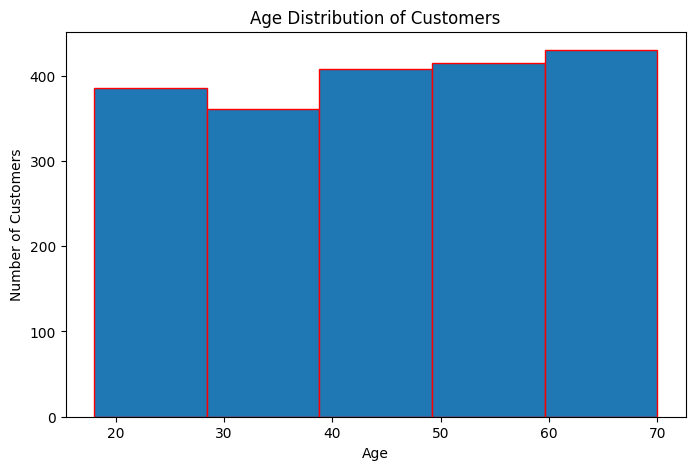

In [223]:
#age distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df["Age"],bins=5,edgecolor="red")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

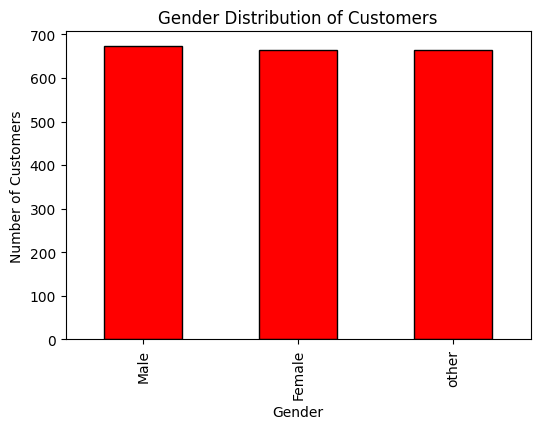

In [224]:
# Gender distribution.
plt.figure(figsize=(6,4))
df["Gender"].value_counts().plot(kind="bar",color="red",edgecolor="black")
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

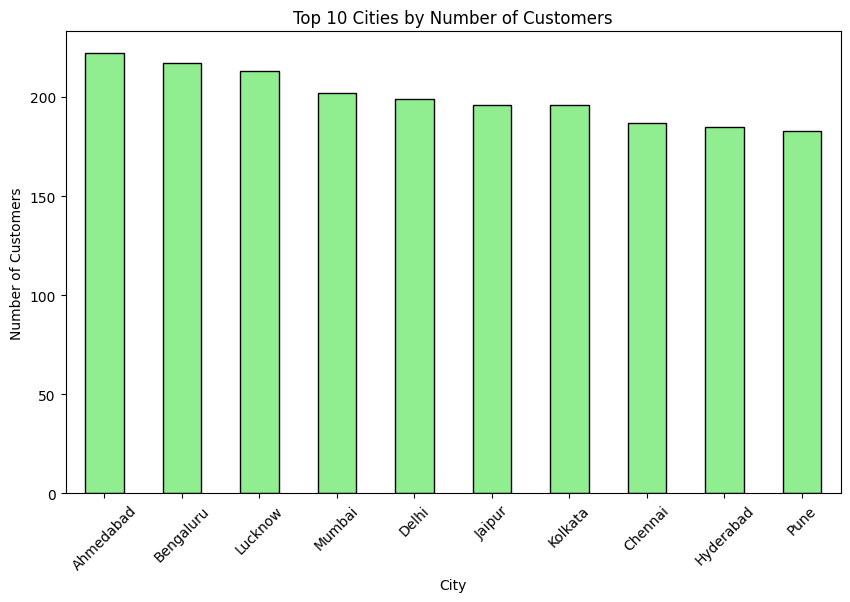

In [225]:
#Customers by city (Top 10 cities)
plt.figure(figsize=(10,6))
df["City"].value_counts().head(10).plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


sales Insights

In [226]:
total_sales=df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False)

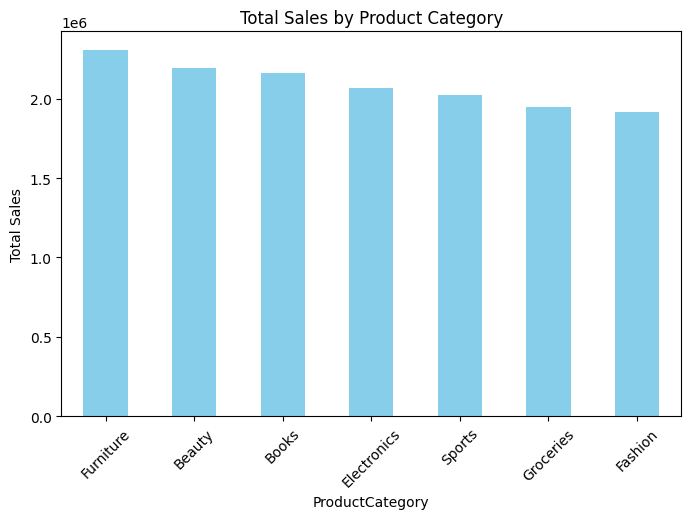

In [227]:
sales_by_category = df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_by_category.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

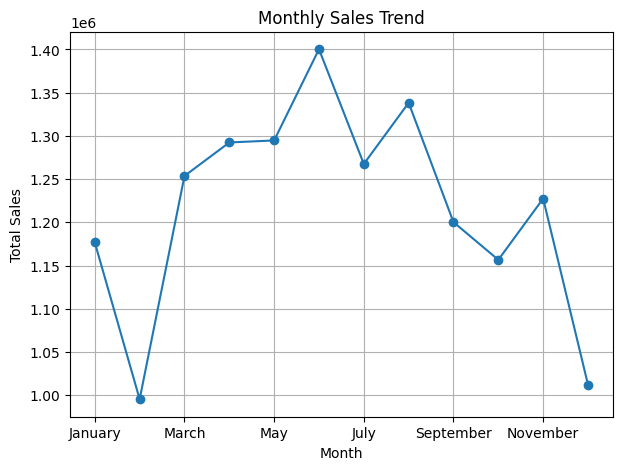

In [228]:
# Ensure months are in correct calendar order
monthly_sales = df.groupby("Month")["TotalAmount"].sum()
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)

# Plot
plt.figure(figsize=(7,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

([<matplotlib.patches.Wedge at 0x249928c2350>,
 [Text(0.7530018365311428, 0.8018654713733011, 'Card'),
  Text(-0.846462229977915, 0.7024967567333075, 'Wallet'),
  Text(-0.6985002152345995, -0.8497631724882048, 'UPI'),
  Text(0.8054050564167433, -0.7492147189546816, 'Cash')],
 [Text(0.41072827447153243, 0.4373811662036187, '26.00%'),
  Text(-0.4617066708970444, 0.38318004912725856, '25.95%'),
  Text(-0.38100011740069056, -0.4635071849935662, '24.20%'),
  Text(0.4393118489545872, -0.4086625739752809, '23.85%')])

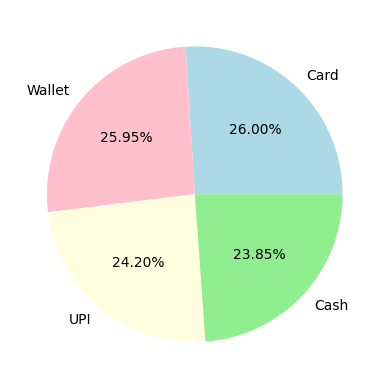

In [229]:
# Payment mode usage (pie chart).
payment=df["PaymentMode"].value_counts()
plt.pie(payment.values,labels=payment.index,autopct="%.2f%%",colors=["lightblue","pink","lightyellow","lightgreen"])

Advanced Insights

In [230]:
#Average spend per customer by age group.
avg=df.groupby("AgeGroup")["TotalAmount"].mean()
avg

C:\Users\yuvas\AppData\Local\Temp\ipykernel_12748\2691361272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg=df.groupby("AgeGroup")["TotalAmount"].mean()


AgeGroup
18-25    7675.836957
26-40    7341.934066
41-60    7232.245259
60+      7149.602067
Name: TotalAmount, dtype: float64

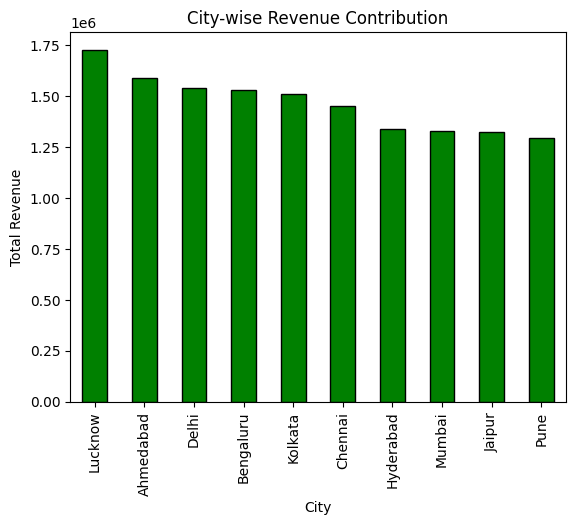

In [231]:
#City-wise revenue contribution (bar chart).
city_revenue=df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False)
plt.Figure(figsize=(10,6))
city_revenue.plot(kind="bar",color="green",edgecolor="black")
plt.title("City-wise Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()

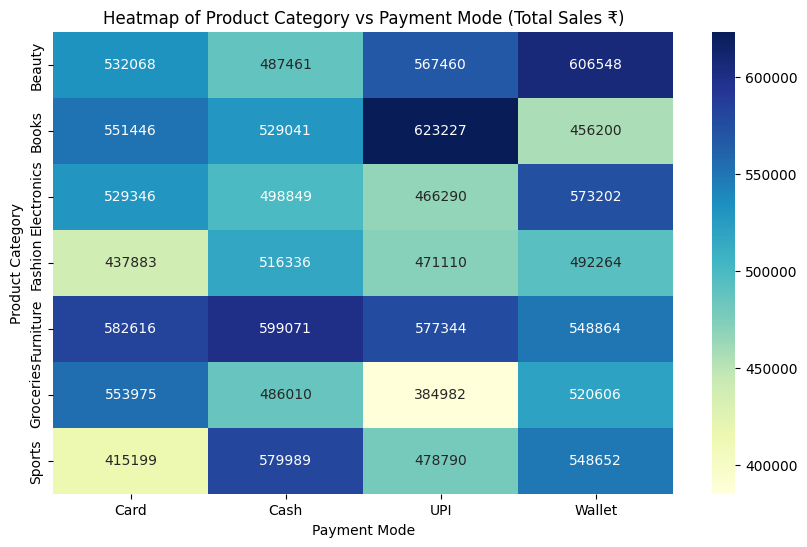

In [232]:
# Heatmap of product category vs payment mode.
heatmap_data = pd.crosstab(df["ProductCategory"], df["PaymentMode"], values=df["TotalAmount"], aggfunc="sum").fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Product Category vs Payment Mode (Total Sales ₹)")
plt.ylabel("Product Category")
plt.xlabel("Payment Mode")
plt.show()
